<h1>Ashish Salunkhe <br>
ashishsalunkhe@ieee.org <br></h1>
<h3>Exploratory Data Analysis</h3>

In [104]:
#!pip3 install pandasql
#!pip3 install wordcloud

     |████████████████████████████████| 361 kB 124 kB/s eta 0:00:01


In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandasql
import string
import re
import nltk
import datetime
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#nltk.download('stopwords')
#nltk.download('punkt')



from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer


%matplotlib inline

In [128]:
rindia = pd.read_csv('all_rIndiaScrapeFinal.csv')

In [129]:
rindia.tail()

,id,title,content,is_original_content,author,flair,score,timestamp,comments_count,crossposts_count,comments,removed_by,self_posted,nsfw,is_stickied,url
2427,g4a2ux,Karnataka CM Yediyurappa defends Kumaraswamy s...,NaN,False,ShankDatNaan,Coronavirus,165,1.587341e+09,26,0,Looks like my comment went right over everyone...,NaN,False,False,False,https://www.indiatoday.in/india/story/karnatak...
2428,foohdw,"""Keep the laathi away, please don't beat the d...",NaN,False,sleepygamer92,Coronavirus,813,1.585163e+09,60,0,Do you have the video of that incident?,NaN,False,False,False,https://twitter.com/ndtv/status/12427666401329...
2429,for182,Parle will donate 3 crore packs of biscuits in...,NaN,False,silentr3b31,Coronavirus,939,1.585175e+09,53,1,wholesome news !,NaN,False,False,False,https://twitter.com/PTI_News/status/1242803329...
2430,fr08ai,"Walking Home: Who they are, why they are leavi...",NaN,False,anonymouse_2001,Coronavirus,549,1.585487e+09,64,0,"No, the apathy of society is what is killing t...",NaN,False,False,False,https://i.redd.it/6079smaumjp41.jpg
2431,g6rguu,Maharashtra minister Jitendra Awhad tests posi...,NaN,False,sherlock_30,Coronavirus,118,1.587694e+09,17,1,Thanks for sharing it.,NaN,False,False,False,https://www.indiatoday.in/india/story/maharash...


In [130]:
rindia['timestamp'] = rindia['timestamp'].apply(lambda x : datetime.datetime.fromtimestamp(x))

In [71]:
rindia.head()

,id,title,content,is_original_content,author,flair,score,timestamp,comments_count,crossposts_count,comments,removed_by,self_posted,nsfw,is_stickied,url
0,2ywjv0,"A Tale of an old man, fiery writer, his mega a...","As asked by /u/crozyguy. Not a referenced, cit...",False,RajaRajaC,Food,137,2015-03-14 02:03:49,158,0,"Beg your pardon , Jayalalitha is a Srirangam n...",NaN,True,False,False,https://www.reddit.com/r/india/comments/2ywjv0...
1,3huilc,"[R] Updated Wiki, Rules & Flairs",#Comment Moderation in Political & Religious T...,False,r_india_mod,Food,35,2015-08-22 03:07:11,98,0,"Also, /r/IndianPeopleFacebook should be listed...",NaN,True,False,False,https://www.reddit.com/r/india/comments/3huilc...
2,2cnzjy,[MOD POST] /r/india needs your help to maintai...,"Hi /r/India, \nStanding close to the 26,000 s...",False,AwkwardDev,[R]eddiquette,230,2014-08-05 19:59:35,420,0,Areee yaar you mods are now behaving like wiki...,NaN,True,False,False,https://www.reddit.com/r/india/comments/2cnzjy...
3,fyyx8c,The wealth inequality in India is truly horrif...,NaN,False,sinsandtonic,Politics,9936,2020-04-11 20:47:54,867,8,This make me mad,NaN,False,False,False,https://i.redd.it/3rol63nk35s41.jpg
4,f9outu,Fuck all Religion,"Fuck all religion. Fuck Hindusim, fuck Islam, ...",False,pking3,Politics,17910,2020-02-26 19:40:49,4190,36,This. This right here!! Fuckkk all religion!!!...,NaN,True,False,False,https://www.reddit.com/r/india/comments/f9outu...


In [72]:
rindia.info()
rindia.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2432 entries, 0 to 2431
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   2432 non-null   object        
 1   title                2432 non-null   object        
 2   content              856 non-null    object        
 3   is_original_content  2432 non-null   bool          
 4   author               2432 non-null   object        
 5   flair                2432 non-null   object        
 6   score                2432 non-null   int64         
 7   timestamp            2432 non-null   datetime64[ns]
 8   comments_count       2432 non-null   int64         
 9   crossposts_count     2432 non-null   int64         
 10  comments             2282 non-null   object        
 11  removed_by           0 non-null      float64       
 12  self_posted          2432 non-null   bool          
 13  nsfw                 2432 non-nul

,score,comments_count,crossposts_count,removed_by
count,2432.000000,2432.000000,2432.000000,0.0
mean,366.616365,173.101562,0.317023,NaN
std,900.530140,518.927039,1.754418,NaN
min,0.000000,0.000000,0.000000,NaN
25%,19.000000,9.000000,0.000000,NaN
50%,75.000000,28.000000,0.000000,NaN
75%,291.000000,85.250000,0.000000,NaN
max,17910.000000,10794.000000,56.000000,NaN


In [73]:
rindia = rindia.drop_duplicates()

In [74]:
# deleting removed_by column since no posts have been removed
del rindia['removed_by']

In [75]:
# correlation between various variables
rindia.corr()

,is_original_content,score,comments_count,crossposts_count,self_posted,nsfw,is_stickied
is_original_content,1.000000,0.034930,-0.037705,0.000386,-0.061597,NaN,-0.003114
score,0.034930,1.000000,0.076615,0.559643,-0.189987,NaN,-0.003934
comments_count,-0.037705,0.076615,1.000000,0.095148,0.323043,NaN,0.136545
crossposts_count,0.000386,0.559643,0.095148,1.000000,-0.081305,NaN,0.007897
self_posted,-0.061597,-0.189987,0.323043,-0.081305,1.000000,NaN,0.027495
nsfw,NaN,NaN,NaN,NaN,NaN,NaN,NaN
is_stickied,-0.003114,-0.003934,0.136545,0.007897,0.027495,NaN,1.000000


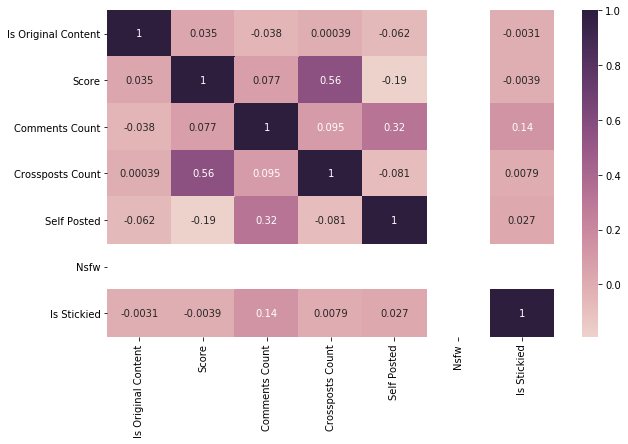

In [76]:
# heat map to visualize correlation between variables

heat_map_labels = [x.replace('_', ' ').title() for x in 
            list(rindia.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(10,6))
_ = sns.heatmap(rindia.corr(), annot=True, xticklabels=heat_map_labels, yticklabels=heat_map_labels, cmap=sns.cubehelix_palette(as_cmap=True), ax=ax)



In [77]:
# Statistics on several fields of interest
print ("'id' Field Overview:")
print (rindia['id'].describe(),"\n")

#print ("'parent_id' Field Overview:")
#print (rindia['parent_id'].describe(),"\n")

print ("'title' Field Overview:")
print (rindia['title'].describe(),"\n")

print ("'author' Field Overview:")
print (rindia['author'].describe(),"\n")

print ("'flair' Field Overview:")
print (rindia['flair'].describe(),"\n")

#print "'subreddit' Field Overview:"
#print rindia['subreddit'].describe(),"\n"

print ("'score' Field Overview:")
print (rindia['score'].describe())

'id' Field Overview:
count       2432
unique      2432
top       g0fo14
freq           1
Name: id, dtype: object 

'title' Field Overview:
count                                      2432
unique                                     2312
top       Late Night Random Discussion Thread !
freq                                        118
Name: title, dtype: object 

'author' Field Overview:
count          2432
unique         1238
top       oxythebot
freq            238
Name: author, dtype: object 

'flair' Field Overview:
count         2432
unique          12
top       Politics
freq           250
Name: flair, dtype: object 

'score' Field Overview:
count     2432.000000
mean       366.616365
std        900.530140
min          0.000000
25%         19.000000
50%         75.000000
75%        291.000000
max      17910.000000
Name: score, dtype: float64


In [78]:
rindia.isnull().sum()

id                        0
title                     0
content                1576
is_original_content       0
author                    0
flair                     0
score                     0
timestamp                 0
comments_count            0
crossposts_count          0
comments                150
self_posted               0
nsfw                      0
is_stickied               0
url                       0
dtype: int64

Plotting the frequency distribution of flairs over all posts

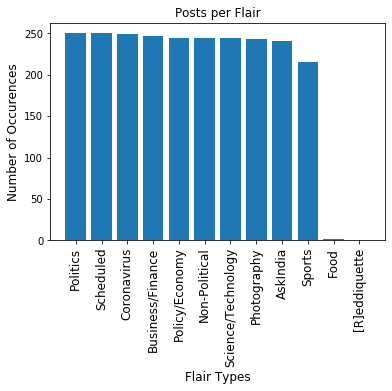

In [79]:
# flair count
num_flair = rindia.flair.value_counts()

# Plotting posts per flair

plt.bar(num_flair.index,num_flair)
plt.title("Posts per Flair")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Number of Occurences',fontsize=12)
plt.xlabel('Flair Types',fontsize=12)
plt.show()

Plotting the distribution of adult content

Content Marked as NSFW - over 18 age: False    2432
Name: nsfw, dtype: int64


[Text(0.5, 0, 'Adult content'), Text(0.5, 1.0, 'Distribution of Conetent')]

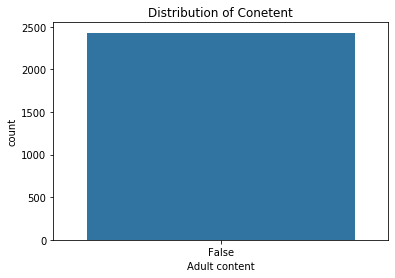

In [80]:
# Getting the count of content marked as nsfw i.e. content over 18 age
nsfw_count = rindia['nsfw'].value_counts()
print("Content Marked as NSFW - over 18 age:",nsfw_count)

# Plotting count of adult content
fig, ax = plt.subplots()
sns.countplot(rindia.nsfw)
ax.set(xlabel='Adult content', title='Distribution of Conetent')

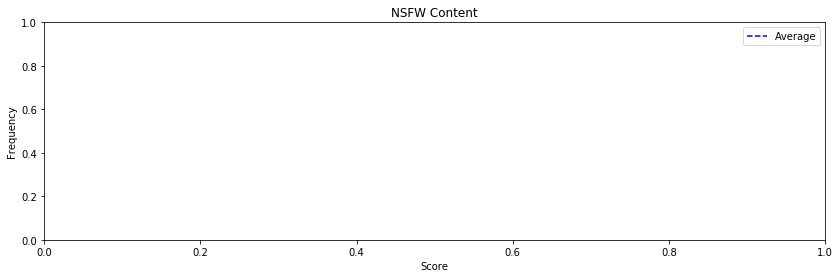

In [81]:
#(rindia[rindia['nsfw'] == True]['id'].count() / rindia.shape[0] ) * 100
nsfw_avg = rindia[rindia['nsfw'] == True]['score'].mean()
fig, ax0 = plt.subplots(sharey=True, figsize=(14,4))
sns.kdeplot(rindia[rindia['nsfw'] == True]['score'], ax=ax0, color='black', label='Score')
ax0.set(xlabel='Score', title='NSFW Content', ylabel='Frequency')
ax0.axvline(x=nsfw_avg, label='Average', linestyle='--', color='blue')
ax0.legend()

The graph shows no occurence of NSFW content. 

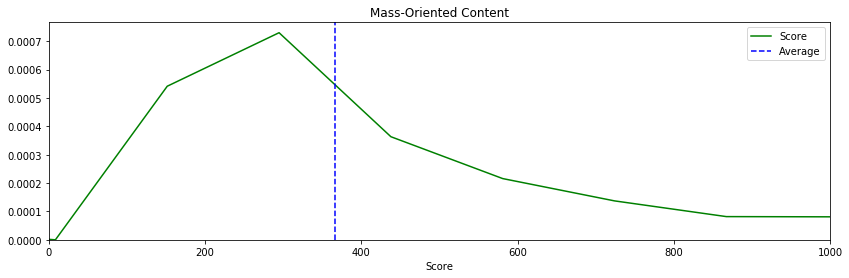

In [82]:
mass_avg = rindia[rindia['nsfw'] == False]['score'].mean()
fig, ax1 = plt.subplots(sharey=True, figsize=(14,4))
sns.kdeplot(rindia[rindia['nsfw'] == False]['score'], ax=ax1, color='green', label='Score')
ax1.set(xlim=(0,1000), xlabel='Score', title='Mass-Oriented Content')
ax1.axvline(x=mass_avg, label='Average', linestyle='--', color='blue')
ax1.legend() 

In [83]:
# authors with maximum posts
top_authors = rindia.query('author != "[deleted]"')['author'].value_counts().reset_index()
top_authors.head(5)

,index,author
0,oxythebot,238
1,hipporama,38
2,Dumma1729,37
3,sudden_dust,35
4,Neglectedsince1994,33


In [84]:
# all-time top authors
(rindia.query('author != "[deleted]"').
 groupby('author')['score'].sum().
 reset_index().sort_values(by='score', ascending=False).head()
)

,author,score
1107,sudden_dust,42436
260,Neglectedsince1994,35777
941,pking3,17910
145,Gavthi_Batman,12659
1214,wordswithmagic,12581


In [85]:
# all time top rated posts
rindia[['title', 'score', 'author', 'timestamp']].sort_values(by='score', ascending=False).head()

,title,score,author,timestamp
4,Fuck all Religion,17910,pking3,2020-02-26 19:40:49
2209,Today's The Hindu,11030,constantinopleF,2020-03-22 16:20:29
3,The wealth inequality in India is truly horrif...,9936,sinsandtonic,2020-04-11 20:47:54
2188,Two NE student in Karnataka were not allowed t...,8025,sharan480,2020-03-29 16:34:14
2191,First day of Lockdown in our city/Andhra Pradesh,7510,queenofmanyqueens,2020-03-25 18:11:08


In [86]:
# posts with most number of comments
rindia[['title', 'comments_count', 'author', 'timestamp']].sort_values(by='comments_count', ascending=False).head()

,title,comments_count,author,timestamp
2183,Coronavirus (COVID-19) Megathread - News and U...,10794,IAmMohit,2020-03-29 08:40:33
2185,Coronavirus (COVID-19) Megathread - News and U...,10764,IAmMohit,2020-03-19 07:23:27
2229,COVID-19 Megathread - News and Updates,5566,IAmMohit,2020-02-12 16:29:51
4,Fuck all Religion,4190,pking3,2020-02-26 19:40:49
2184,Coronavirus (COVID-19) Megathread - News and U...,3666,IAmMohit,2020-04-16 09:30:15


In [87]:
rindia['created_loc_time'] = pd.to_datetime(rindia['timestamp'])

In [88]:
rindia['created_loc_time'].sort_values(ascending=True).head()

2      2014-08-05 19:59:35
0      2015-03-14 02:03:49
1      2015-08-22 03:07:11
1423   2019-04-07 16:52:44
1444   2019-05-03 19:32:19
Name: created_loc_time, dtype: datetime64[ns]



Average Number of Comments: 25.32 



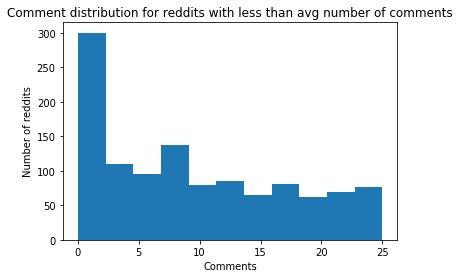

In [89]:
# comment distribution for reddits with less than average number of comments
comment_avg = rindia[rindia['comments_count'] == True]['score'].mean()
print("\n")
print("Average Number of Comments:",comment_avg,"\n")

fig, ax = plt.subplots()
_ = sns.distplot(rindia[rindia["comments_count"] < comment_avg]["comments_count"], kde=False, rug=False, hist_kws={'alpha': 1}, ax=ax)
_ = ax.set(xlabel="comments_count", ylabel="id")
plt.title("Comment distribution for reddits with less than avg number of comments")
plt.ylabel("Number of reddits")
plt.xlabel("Comments")
plt.show()

In [90]:
# authors with most number of comments
rindia[['author','comments_count']].sort_values(by='comments_count', ascending=False).head()

,author,comments_count
2183,IAmMohit,10794
2185,IAmMohit,10764
2229,IAmMohit,5566
4,pking3,4190
2184,IAmMohit,3666


In [91]:
# authors with most number of comments_count = 
self_posted_count = rindia['self_posted'].sum()
self_posted_count
#rindia[['author','self_posted']].sort_values(by='self_posted', ascending=False).head(50)

857

In [92]:
# Count the number of authors with at least a certain number of threshold comments
author_data = rindia.groupby(rindia.author)

author_count = []
comment_count = []
comment_threshold_count = [0,1,5,10,20,50,100,200,300,400,500,600]

for count in comment_threshold_count:
    num_authors = author_data.filter(lambda x: len(x) > count).apply(pd.Series.nunique)['author']
    num_comments = author_data.filter(lambda x: len(x) > count).apply(pd.Series.nunique)['id']
    
    author_count.append(num_authors)
    comment_count.append(num_comments)

/home/ashish/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


<Figure size 432x288 with 0 Axes>

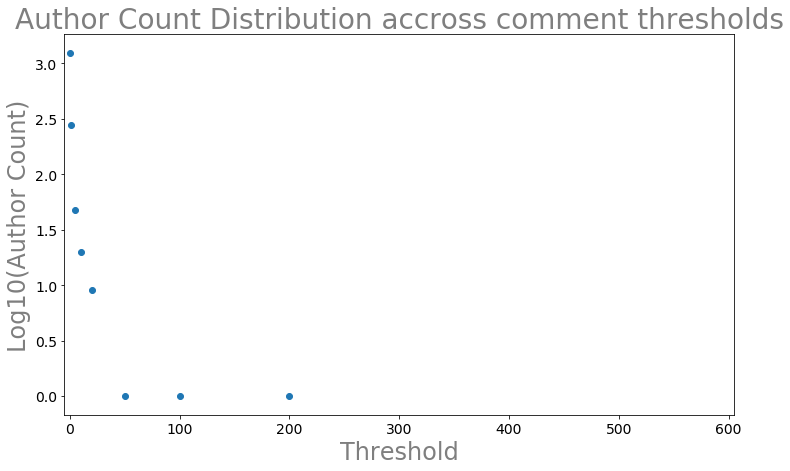

In [93]:
# Number of authors at various comment thresholds

# Seaborn plot traits
sns.despine()
fig, ax = plt.subplots()
plt.scatter(x=comment_threshold_count, y=np.log10(author_count))
ax.set_xlim([-5,605])
ax.set_title('Author Count Distribution accross comment thresholds', fontsize=28,color="black",alpha=0.5)
ax.set_xlabel("Threshold",size = 24,color="black",alpha=0.5)
ax.set_ylabel("Log10(Author Count)",size = 24,color="black",alpha=0.5)
ax.tick_params(labelsize=14,labelcolor="black")
fig.set_size_inches(12,7)

In [94]:
# Calculate the Percent of Comments Contributed by Various Percent of Total Authors
total_authors = author_data.filter(lambda x: len(x) > 0).apply(pd.Series.nunique)['author']
total_comments = len(rindia)

percent_author = [100]
for count in author_count:
    percent = 100 * count / float(total_authors)
    percent_author.append(percent)

percent_comments = [100]
for count in comment_count:
    percent = 100 * count / float(total_comments)
    percent_comments.append(percent)

<Figure size 432x288 with 0 Axes>

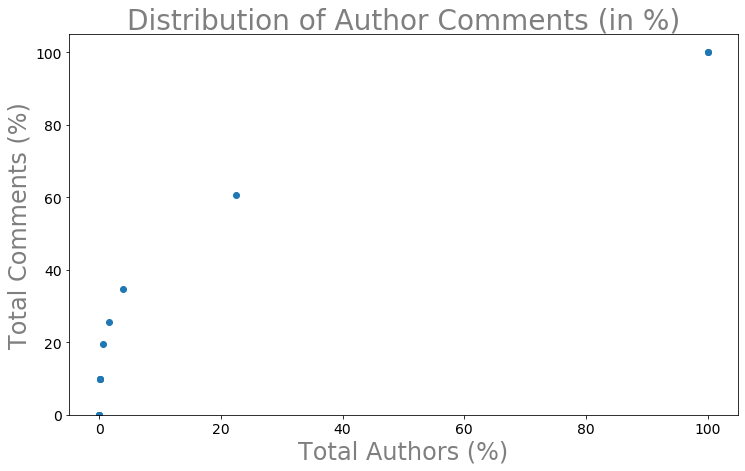

In [95]:

# Seaborn plot traits
sns.despine()
fig, ax = plt.subplots()
plt.scatter(percent_author,percent_comments)
ax.set_xlim([-5,105])
ax.set_ylim([0,105])
ax.set_title('Distribution of Author Comments (in %)', fontsize=28,color="black",alpha=0.5)
ax.set_xlabel("Total Authors (%)",size = 24,color="black",alpha=0.5)
ax.set_ylabel("Total Comments (%)",size = 24,color="black",alpha=0.5)
ax.tick_params(labelsize=14,labelcolor="black")
fig.set_size_inches(12,7)

In [96]:
# adding synthetic feature - comment length
rindia['comment_length'] = rindia['comments'].str.len()

No handles with labels found to put in legend.


<Figure size 432x288 with 0 Axes>

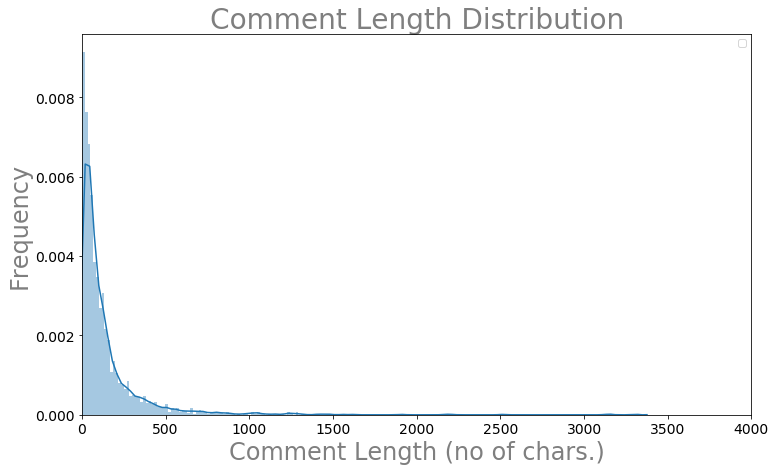

In [97]:
x = rindia.comment_length
sns.despine()
fig, ax = plt.subplots()
sns.distplot(x, bins=200,ax=ax)
ax.set_xlim([0,4000])
ax.set_title('Comment Length Distribution', fontsize=28,color="black",alpha=0.5)
ax.set_xlabel("Comment Length (no of chars.)",size = 24,color="black",alpha=0.5)
ax.set_ylabel("Frequency",size = 24,color="black",alpha=0.5)
ax.tick_params(labelsize=14,labelcolor="black")
ax.legend()

fig.set_size_inches(12,7)

In [98]:
flair_comment_count = rindia.groupby('flair',sort=True)['comments_count'].sum()

In [99]:
print(flair_comment_count)

flair
AskIndia                9823
Business/Finance        5353
Coronavirus            57151
Food                     256
Non-Political          20131
Photography             5127
Policy/Economy          7732
Politics               29744
Scheduled             277135
Science/Technology      4388
Sports                  3723
[R]eddiquette            420
Name: comments_count, dtype: int64


In [100]:
flair_label = []
comment_count = []
for x,y in flair_comment_count.items():
    flair_label.append(x)
    comment_count.append(y)

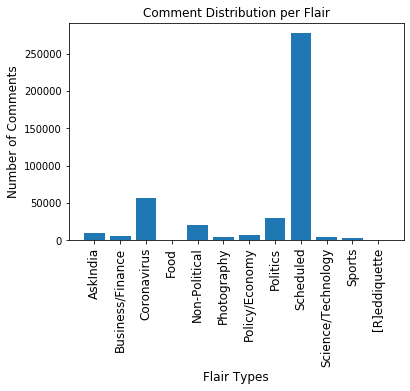

In [101]:
# plotting graph to visualize comment distribution per flair

plt.bar(flair_label,comment_count)
plt.title("Comment Distribution per Flair")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Number of Comments',fontsize=12)
plt.xlabel('Flair Types',fontsize=12)
plt.show()

In [102]:
flair_score_count = rindia.groupby('flair',sort=True)['score'].sum()

In [103]:
print(flair_score_count)

flair
AskIndia               16102
Business/Finance       29205
Coronavirus           247074
Food                     172
Non-Political         186947
Photography            86634
Policy/Economy         45909
Politics              203556
Scheduled               5909
Science/Technology     21960
Sports                 47913
[R]eddiquette            230
Name: score, dtype: int64


In [104]:
flair_label = []
score_count = []
for x,y in flair_score_count.items():
    flair_label.append(x)
    score_count.append(y)

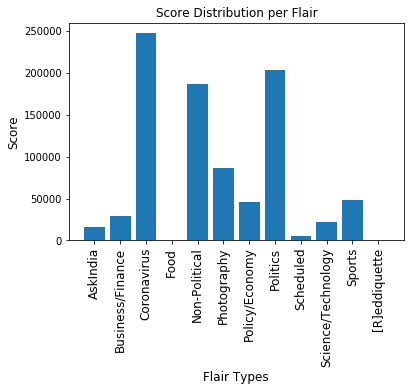

In [106]:
# plotting graph to visualize score distribution per flair

plt.bar(flair_label,score_count)
plt.title("Score Distribution per Flair")
plt.xticks(rotation=90,fontsize=12)
plt.ylabel('Score',fontsize=12)
plt.xlabel('Flair Types',fontsize=12)
plt.show()

In [107]:
# # text preprocessing
# rindia['comments'] = rindia.fillna({'comments':''})

# def clean_text(text):
    
#     ## Remove puncuation
#     text = text.translate(string.punctuation)
    
#     ## Convert words to lower case and split them
#     text = text.lower().split()
    
#     ## Remove stop words
#     stops = set(stopwords.words("english"))
#     text = [w for w in text if not w in stops and len(w) >= 3]
    
#     text = " ".join(text)

#     # Clean the text
#     text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
#     text = re.sub(r"what's", "what is ", text)
#     text = re.sub(r"\'s", " ", text)
#     text = re.sub(r"\'ve", " have ", text)
#     text = re.sub(r"n't", " not ", text)
#     text = re.sub(r"i'm", "i am ", text)
#     text = re.sub(r"\'re", " are ", text)
#     text = re.sub(r"\'d", " would ", text)
#     text = re.sub(r"\'ll", " will ", text)
#     text = re.sub(r",", " ", text)
#     text = re.sub(r"\.", " ", text)
#     text = re.sub(r"!", " ! ", text)
#     text = re.sub(r"\/", " ", text)
#     text = re.sub(r"\^", " ^ ", text)
#     text = re.sub(r"\+", " + ", text)
#     text = re.sub(r"\-", " - ", text)
#     text = re.sub(r"\=", " = ", text)
#     text = re.sub(r"'", " ", text)
#     text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
#     text = re.sub(r":", " : ", text)
#     text = re.sub(r" e g ", " eg ", text)
#     text = re.sub(r" b g ", " bg ", text)
#     text = re.sub(r" u s ", " american ", text)
#     text = re.sub(r"\0s", "0", text)
#     text = re.sub(r" 9 11 ", "911", text)
#     text = re.sub(r"e - mail", "email", text)
#     text = re.sub(r"j k", "jk", text)
#     text = re.sub(r"\s{2,}", " ", text)
    
#     text = text.split()
#     stemmer = SnowballStemmer('english')
#     stemmed_words = [stemmer.stem(word) for word in text]
#     text = " ".join(stemmed_words)

#     return text

# puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
#  '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
#  '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
#  '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
#  '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

# def clean_char(x):
#     x = str(x)
#     for punct in puncts:
#         if punct in x:
#             x = x.replace(punct, f' {punct} ')
#     return x

In [108]:
# rindia['comments'] = rindia['comments'].map(lambda a: clean_text(a))
#rindia['comments'] = rindia['comments'].map(lambda a: clean_char(a))

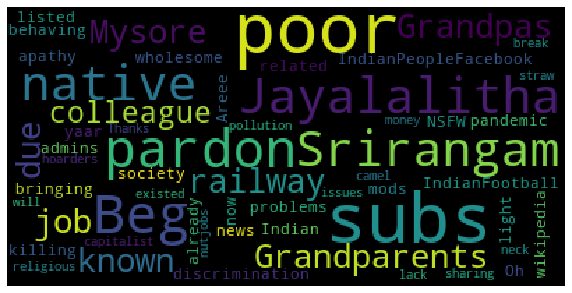

In [109]:


text = rindia['comments'].values 

wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="black").generate(str(text))
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('comment_wordcloud.png', facecolor='k', bbox_inches='tight')

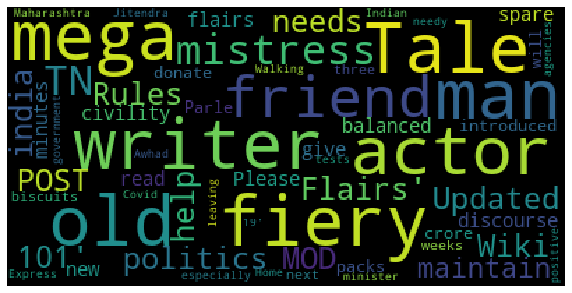

In [110]:
text = rindia['title'].values 

wordcloud = WordCloud(max_font_size=50, max_words=200, background_color="black").generate(str(text))
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('title_wordcloud.png', facecolor='k', bbox_inches='tight')

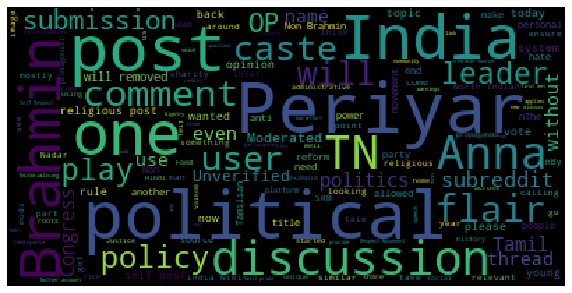

In [111]:
text = rindia['content'].values 
wordcloud = WordCloud(max_font_size=50, max_words=1000, background_color="black").generate(str(text))
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
#plt.savefig('content_wordcloud.png', facecolor='k', bbox_inches='tight')

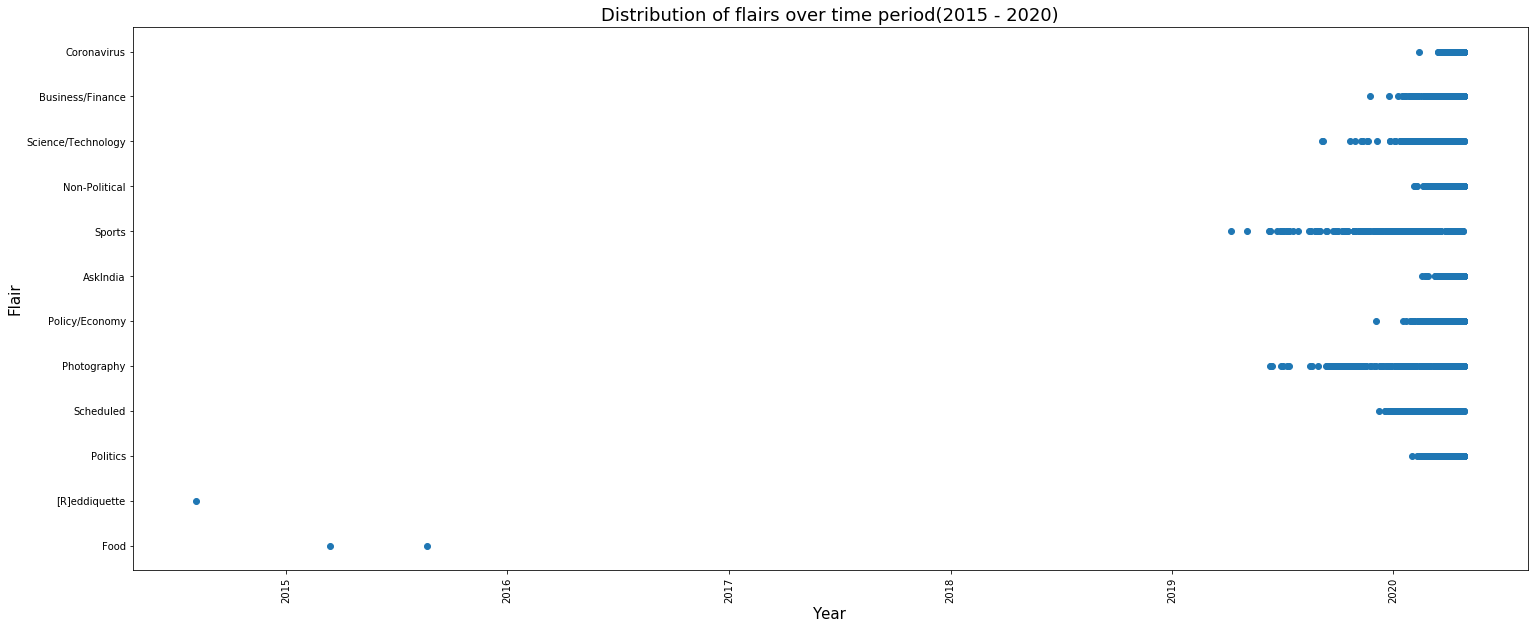

In [118]:
# distribution of flairs over time period (2015-2020)

plt.figure(figsize =(25,10))
plt.plot_date(rindia.timestamp, rindia.flair)
plt.xticks(rotation=90)
plt.title('Distribution of flairs over time period(2015 - 2020)', fontsize=18)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Flair", fontsize=15)
plt.show()